In [ ]:
%matplotlib inline


# cross validation

This example shows how to app different cross
validation techniques using ai4water

In [2]:

import site
site.addsitedir("D:\\mytools\\AI4Water")


from ai4water import Model
from ai4water.preprocessing import DataSet
from ai4water.datasets import busan_beach
from ai4water.utils.utils import get_version_info


In [3]:

for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [4]:
data = busan_beach()

## TimeSeriesSplit



In [5]:
ds = DataSet(data=data)

splits = ds.TimeSeriesSplit_splits(n_splits=5)

for fold, ((train_x, train_y), (test_x, test_y)) in enumerate(splits):
    print(fold, train_x.shape, train_y.shape, test_x.shape, test_y.shape)


********** Removing Examples with nan in labels  **********

0 (27, 13) (27, 1) (25, 13) (25, 1)
1 (52, 13) (52, 1) (25, 13) (25, 1)
2 (77, 13) (77, 1) (25, 13) (25, 1)
3 (102, 13) (102, 1) (25, 13) (25, 1)
4 (127, 13) (127, 1) (25, 13) (25, 1)



********** Removing Examples with nan in labels  **********



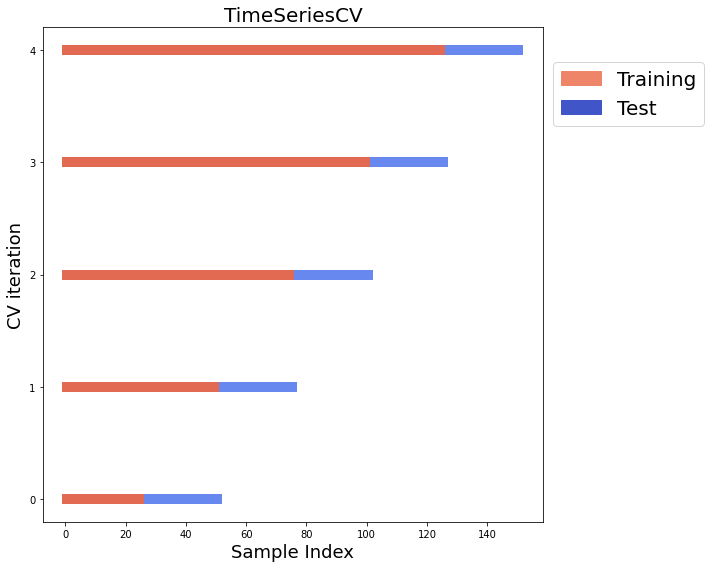

In [8]:
ds.plot_TimeSeriesSplit_splits(n_splits=5)

In [ ]:
model = Model(
    model={'RandomForestRegressor': {}},
    cross_validator={'TimeSeriesSplit': {'n_splits': 5}},
    val_metric="r2",
    verbosity=0,
)

tssplit_score = model.cross_val_score(data=data)

## KFold



In [ ]:
ds = DataSet(data=data)

splits = ds.KFold_splits(n_splits=5)

for fold, ((train_x, train_y), (test_x, test_y)) in enumerate(splits):
    print(fold, train_x.shape, train_y.shape, test_x.shape, test_y.shape)

In [ ]:
ds.plot_KFold_splits(n_splits=5)

In [ ]:
model = Model(
    model={'RandomForestRegressor': {}},
    cross_validator={'KFold': {'n_splits': 5}},
    val_metric="r2",
    verbosity=0,
)

kfold_score = model.cross_val_score(data=data)

## LeaveOneOut



In [ ]:
ds = DataSet(data=data.iloc[0:600, :])  # not using all data because it takes more time

splits = ds.LeaveOneOut_splits()

for fold, ((train_x, train_y), (test_x, test_y)) in enumerate(splits):
    print(fold, train_x.shape, train_y.shape, test_x.shape, test_y.shape)

In [ ]:
ds.plot_LeaveOneOut_splits()

In [ ]:
model = Model(
    model={'RandomForestRegressor': {}},
    cross_validator={'LeaveOneOut': {}},
    val_metric="mse",
    verbosity=0,
)

loo_score = model.cross_val_score(data=data.iloc[0:600, :])